In [1]:
# Compare Algorithms
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [5]:
# Load dataset
X_train_raw_keyword = np.load(r"processed_data/raw_keyword_categorical_X_train.npy", allow_pickle=True)
y_train = np.load(r"processed_data/raw_keyword_categorical_y_train.npy", allow_pickle=True)
test_processed_raw_keyword = np.load(r"processed_data/raw_keyword_categorical_test_processed_csr.npy", allow_pickle=True)

X_train_lemma_keyword = np.load(r"processed_data/lemma_keyword_categorical_X_train_csr.npy", allow_pickle=True)
test_processed_lemma_keyword = np.load(r"processed_data/lemma_keyword_categorical_test_processed_csr.npy", allow_pickle=True)

/home/alex/miniconda3/envs/spacy/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LR: 0.754755 (0.030745)


/home/alex/miniconda3/envs/spacy/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LDA: 0.478532 (0.066021)


/home/alex/miniconda3/envs/spacy/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.616953 (0.048250)


/home/alex/miniconda3/envs/spacy/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.671608 (0.023894)


/home/alex/miniconda3/envs/spacy/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


NB: 0.601349 (0.025804)


/home/alex/miniconda3/envs/spacy/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.708116 (0.041352)


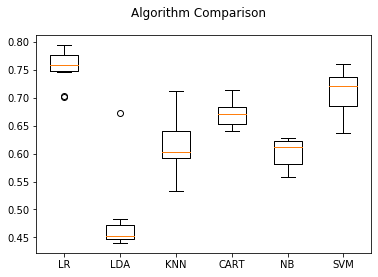

CPU times: user 5h 43min 21s, sys: 5min 48s, total: 5h 49min 9s
Wall time: 3h 52min 35s


In [6]:
%%time
# Prepare configuration for cross validation test harness
seed = 42

# Prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train_raw_keyword, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()